In [66]:
import pandas as pd

# load the dataset.csv
df = pd.read_csv('dataset.csv')
df.describe()

,number_of_times_pregnant,glucose_concentration,blood_presure,skinfold_thickness,serum_insulin,bmi,diabetes_pedigree_function,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [67]:
features = df.drop(columns=['class']).select_dtypes(include=['float64', 'int64'])
target = df['class']

In [68]:
# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

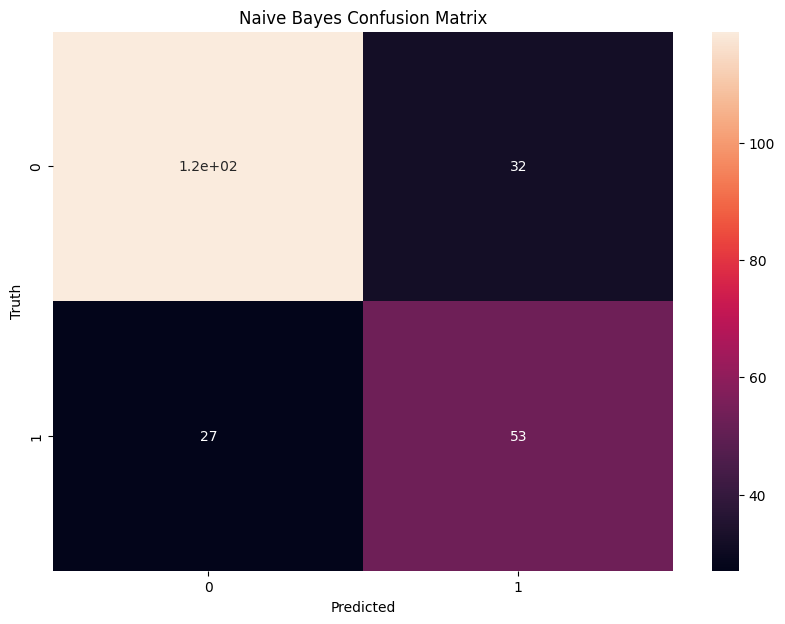

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



In [69]:
# use naive bayes classifier
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

model = GaussianNB()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
confusion = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

print(metrics.classification_report(y_test, y_pred))

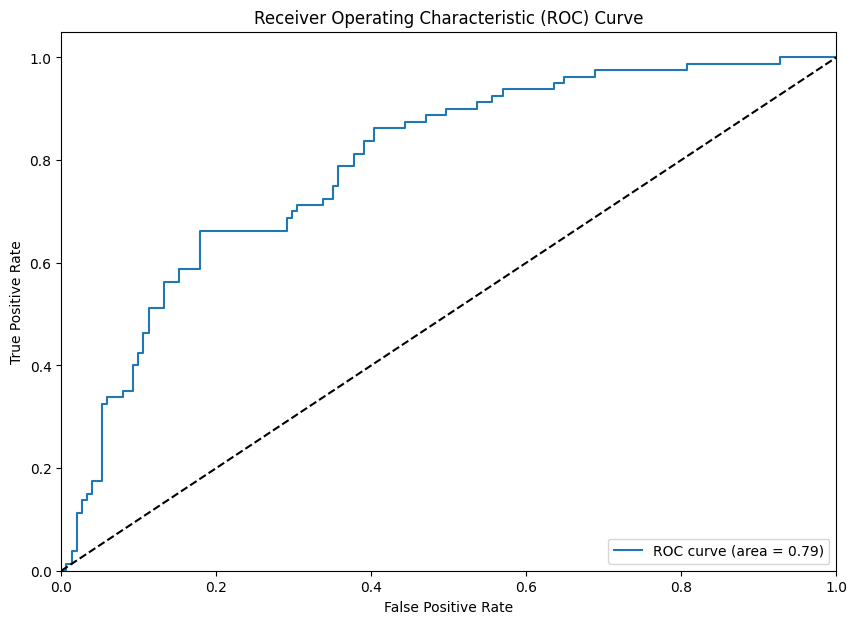

In [70]:
# get the predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# compute FPR, TPR, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)

# calculate the AUC (Area Under the Curve)
roc_auc = metrics.roc_auc_score(y_test, y_prob)

# plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


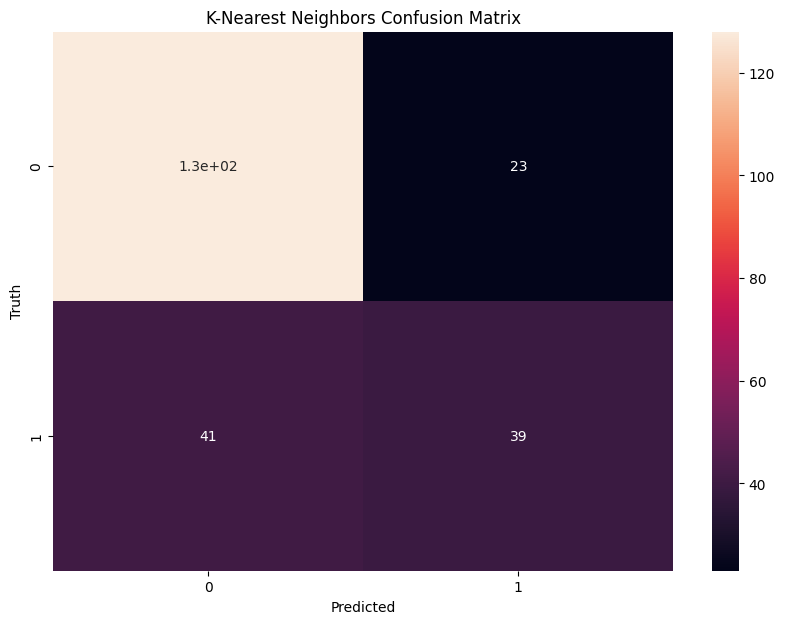

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       151
           1       0.63      0.49      0.55        80

    accuracy                           0.72       231
   macro avg       0.69      0.67      0.67       231
weighted avg       0.71      0.72      0.71       231



In [71]:
# use k-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
confusion = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True)
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

print(metrics.classification_report(y_test, y_pred))

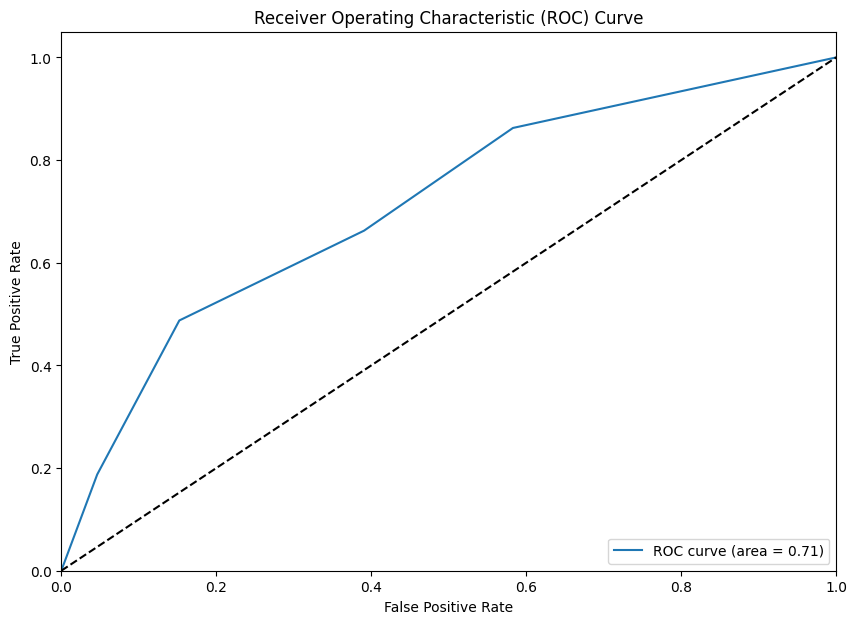

In [72]:
# get the predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# compute FPR, TPR, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)

# calculate the AUC (Area Under the Curve)
roc_auc = metrics.roc_auc_score(y_test, y_prob)

# plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

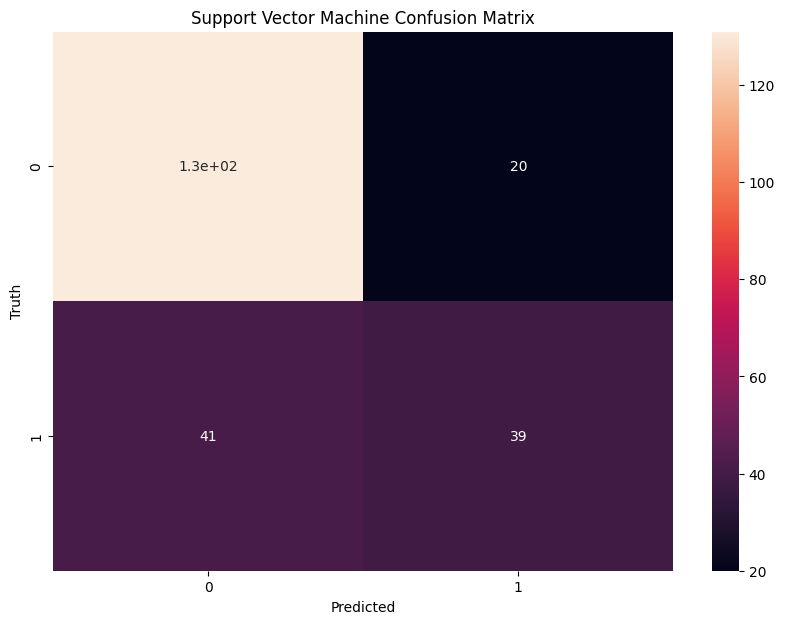

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       151
           1       0.66      0.49      0.56        80

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



In [73]:
# use support vector machine classifier
from sklearn.svm import SVC

model = SVC(probability=True)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
confusion = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True)
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

print(metrics.classification_report(y_test, y_pred))

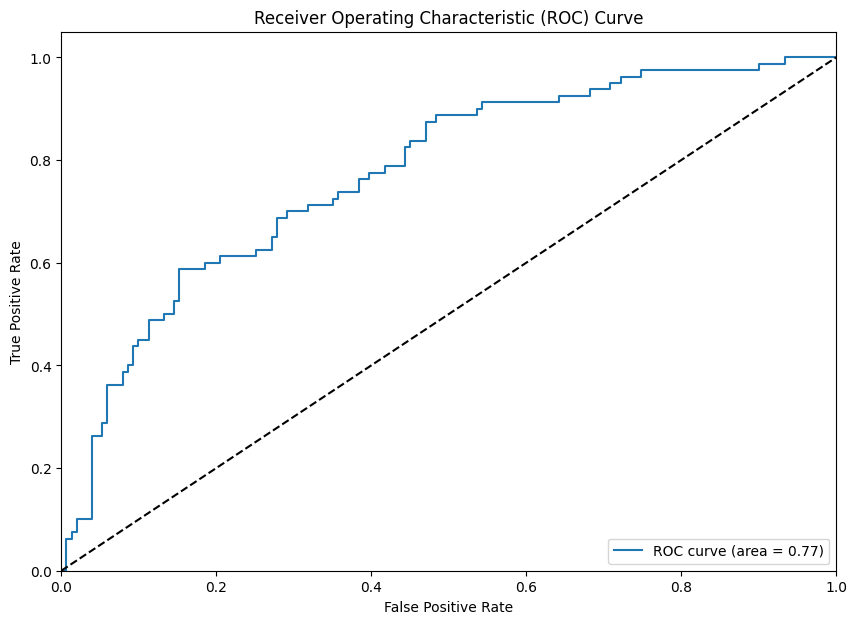

In [74]:
# get the predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# compute FPR, TPR, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)

# calculate the AUC (Area Under the Curve)
roc_auc = metrics.roc_auc_score(y_test, y_prob)

# plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

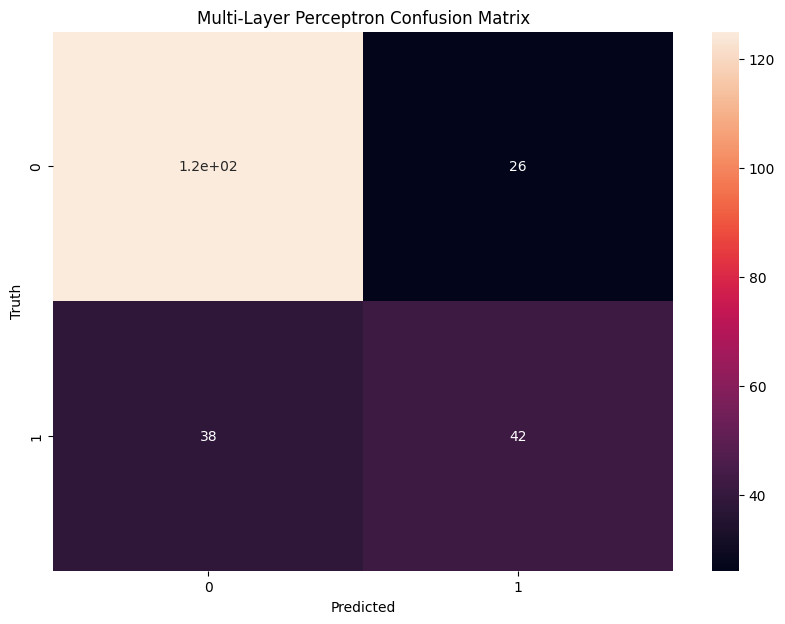

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       151
           1       0.62      0.53      0.57        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.72      0.72      0.72       231



In [75]:
# use multi-layer perceptron classifier
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
confusion = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True)
plt.title('Multi-Layer Perceptron Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

print(metrics.classification_report(y_test, y_pred))

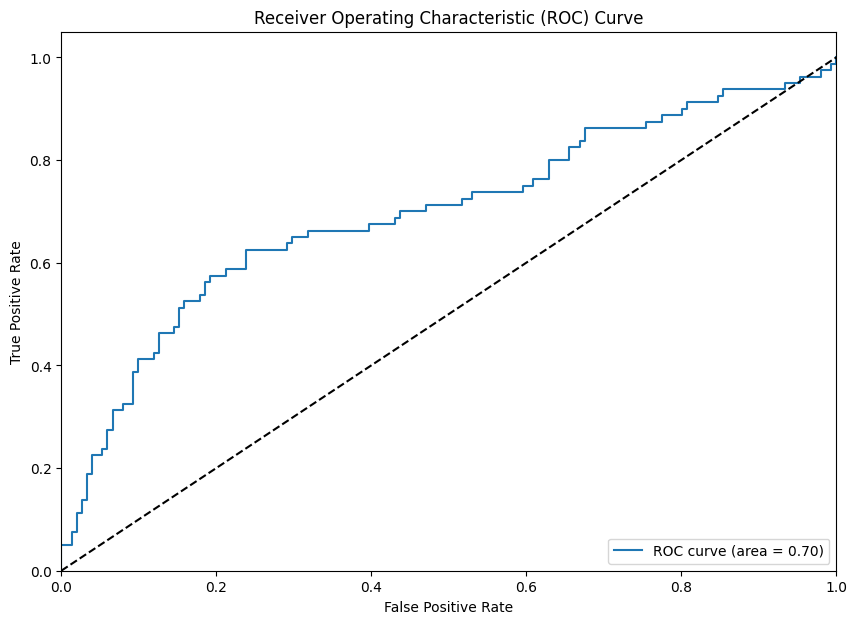

In [76]:
# get the predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# compute FPR, TPR, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)

# calculate the AUC (Area Under the Curve)
roc_auc = metrics.roc_auc_score(y_test, y_prob)

# plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()